In [7]:
# some basic imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
import ast


Handle and Clean the movie and character metadata dataframe:

1) download
2) visualise 
3) clean (drop and transform)
4) merge 
5) save final dataframe



In [86]:
# Load the general data:
character_metadata_path = '../data/character.metadata.tsv'
movie_metadata_path = '../data/movie.metadata.tsv'

character_metadata = pd.read_csv(character_metadata_path, sep='\t')
movie_metadata = pd.read_csv(movie_metadata_path, sep='\t')

# Visualise the DataFrames (to see with what we are working):
print(f'the size of the dataframe is:{character_metadata.shape}') #-- shape = (450668, 13)
character_metadata #need to rename the columns

the size of the dataframe is:(450668, 13)


,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,Unnamed: 7,Wanda De Jesus,42,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
0,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
1,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
2,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
3,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
4,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450663,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450664,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450665,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450666,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


In [87]:
print(f'the size of the dataframe is:{movie_metadata.shape}') #-- shape = (81740, 9)
movie_metadata #need to rename the columns

the size of the dataframe is:(81740, 9)


,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science Fiction"", ""/m/03npn"": ""Horror"", ""/m/03k9fj"": ""Adventure"", ""/m/0fdjb"": ""Supernatural"", ""/m/02kdv5l"": ""Action"", ""/m/09zvmj"": ""Space western""}"
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
1,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
3,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
4,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
...,...,...,...,...,...,...,...,...,...
81735,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81736,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81737,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81738,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


In [88]:
# The column titles need to be rename with the name given in the read.me of the dataset
new_column_names_c = [
    "Wikipedia_movie_ID",
    "Freebase_movie_ID",
    "Movie_release_date",
    "Character_name",
    "Actor_date_of_birth",
    "Actor_gender",
    "Actor_height_m",
    "Actor_ethnicity",
    "Actor_name",
    "Actor_age_at_movie_release",
    "Freebase_character_actor_map_ID",
    "Freebase_character_ID",
    "Freebase_actor_ID"
]

new_column_names_m = [
    "Wikipedia_movie_ID",
    "Freebase_movie_ID",
    "Movie_name",
    "Movie_release_date",
    "Movie_box_office_revenue",
    "Movie_runtime",
    "Movie_languages",
    "Movie_countries",
    "Movie_genres"
]

# Rename the columns by directly setting DataFrame.columns
character_metadata.columns = new_column_names_c
movie_metadata.columns = new_column_names_m


In [89]:
# Function to plot the percentage of missing values for each column
def plot_missing_percentage(dataframe):
    missing_percentage = dataframe.isna().mean() * 100  # Calculate the percentage of NaNs

    plt.figure(figsize=(10, 5))
    plt.bar(dataframe.columns, missing_percentage)
    plt.title("Percentage of Missing Values per Column in Character_metadata")
    plt.xlabel("Columns")
    plt.ylabel("Percentage of Missing Values (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Function to plot the number of rows remaining after dropping missing values per column
def plot_remaining_rows(dataframe):
    remaining_rows = dataframe.apply(lambda col: len(col.dropna()))  # Rows left after dropping NaNs per column

    plt.figure(figsize=(10, 5))
    plt.bar(dataframe.columns, remaining_rows)
    plt.title("Remaining Row Count after Dropping Missing Values per Column in Character_metadata")
    plt.xlabel("Columns")
    plt.ylabel("Number of Remaining Rows")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

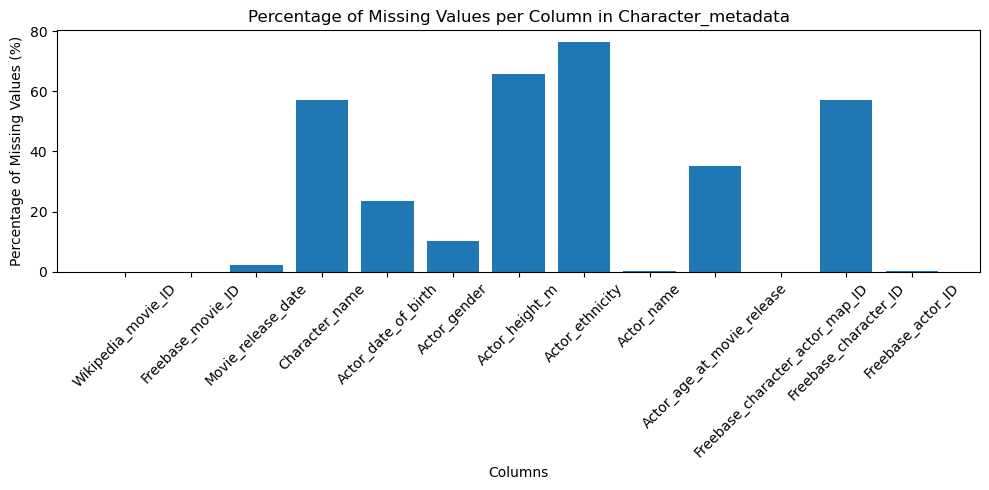

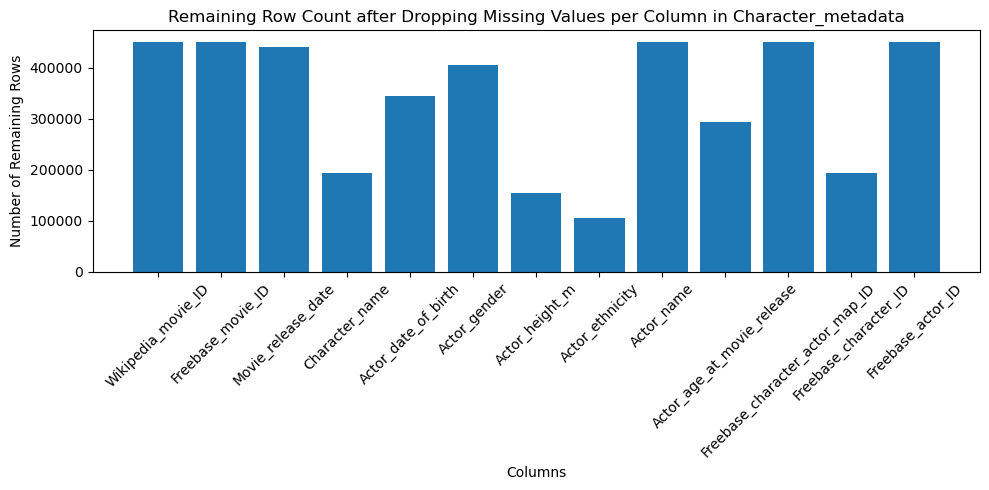

Remaining rows for 'Wikipedia_movie_ID': 450668
Remaining rows for 'Movie_release_date': 440673
Remaining rows for 'Actor_ethnicity': 106058
        Wikipedia_movie_ID Movie_release_date Actor_ethnicity
0                   975900         2001-08-24      /m/044038p
1                   975900         2001-08-24         /m/0x67
4                   975900         2001-08-24         /m/0x67
10                  975900         2001-08-24       /m/064b9n
26                 3196793         2000-02-16         /m/0x67
...                    ...                ...             ...
450626            23687925               1952        /m/0xnvg
450630            30553937         1998-03-07       /m/033tf_
450642            12476867               2002        /m/041rx
450643            12476867               2002        /m/041rx
450665            28308153               1957       /m/02w7gg

[102842 rows x 3 columns]


In [54]:
# Clean the character metadata dataframe:

plot_missing_percentage(character_metadata)
plot_remaining_rows(character_metadata)

# We continue the analysis only on the column of interest:
# Wikipedia_movie_ID, Movie_release_date, Actor_ethnicity

# Check the exact count of remaining rows for these columns
columns_to_check = ['Wikipedia_movie_ID', 'Movie_release_date', 'Actor_ethnicity']
remaining_rows = {col: character_metadata[col].dropna().shape[0] for col in columns_to_check}
# Print the results
for col, count in remaining_rows.items():
    print(f"Remaining rows for '{col}': {count}")

# We only keep the rows where all the three information are available
filtered_character = character_metadata[['Wikipedia_movie_ID', 'Movie_release_date', 'Actor_ethnicity']].dropna(subset=['Actor_ethnicity']) 
filtered_character = filtered_character[['Wikipedia_movie_ID', 'Movie_release_date', 'Actor_ethnicity']].dropna(subset=['Movie_release_date'])
filtered_character = filtered_character[['Wikipedia_movie_ID', 'Movie_release_date', 'Actor_ethnicity']].dropna(subset=['Wikipedia_movie_ID'])

# Display the new filtered DataFrame
print(filtered_character)

In [90]:
# We need to clean release date (as we see that there is several ways to write the date)
filtered_character['Movie_release_date'] = filtered_character['Movie_release_date'].astype(str).str[:4]

# Display the updated DataFrame
filtered_character

,Wikipedia_movie_ID,Movie_release_date,Actor_ethnicity
0,975900,2001,/m/044038p
1,975900,2001,/m/0x67
4,975900,2001,/m/0x67
10,975900,2001,/m/064b9n
26,3196793,2000,/m/0x67
...,...,...,...
450626,23687925,1952,/m/0xnvg
450630,30553937,1998,/m/033tf_
450642,12476867,2002,/m/041rx
450643,12476867,2002,/m/041rx


In [91]:
# We want to replace the ethnicity code by the ethnicity 
# To do so we need an external database

# mapping freebase to wikidata id 
# import csv
def fb_to_wiki(freebase_id):  #pas encore utilisé mais peut etre utile pour autre chose
    # Open and read the .tsv file
    map_table = "../data/fb_wiki_mapping.tsv"
    with open(map_table, mode='r', newline='', encoding='utf-8') as tsv_file:
        reader = csv.reader(tsv_file, delimiter='\t')
        for row in reader:
            # The columns in the .tsv file are: freebase_id, wikidata_id, label
            if row[0] == freebase_id:  # Check if the Freebase ID matches
                wikidata_id = row[1]
                label = row[2]
                return wikidata_id, label
    return None, None  # Return None if Freebase ID is not found

def fb_to_label(freebase_id,conversion_table):
    if freebase_id in conversion_table.index:
        return conversion_table.loc[freebase_id,'label']
    else:
        return None   
    
#change column of the ethnicities
#list all ethnicities
ethnicities = filtered_character['Actor_ethnicity'].unique()
ethnicities_list = ethnicities.tolist()
fb_wiki_gen = pd.read_csv('../data/fb_wiki_mapping.tsv',sep='\t')
fb_wiki_gen.set_index('freebase_id',inplace=True)
fb_wiki_ethnic = fb_wiki_gen.loc[fb_wiki_gen.index.isin(ethnicities_list)]  #we now have a smaller df which will correspond the right freebase_id to wiki_id and label

character_final_df = filtered_character.copy()
character_final_df['Actor_ethnicity'] = character_final_df['Actor_ethnicity'].apply(fb_to_label, conversion_table=fb_wiki_ethnic)

character_final_df = character_final_df.dropna(subset=['Actor_ethnicity'])
character_final_df['Actor_ethnicity'] = character_final_df['Actor_ethnicity'].astype(str)

print("DataFrame shape:", character_final_df.shape)
character_final_df.sample(10)

DataFrame shape: (90195, 3)


,Wikipedia_movie_ID,Movie_release_date,Actor_ethnicity
6816,22144721,2010,Ashkenazi Jews
291637,15881207,2008,Italian Americans
63518,584713,1991,Asian Americans
337022,3269896,1974,Asian Americans
292318,1321819,1997,Irish Americans
235534,5646957,1996,Irish Canadians
91110,1071462,1992,Italian Americans
155101,10107470,1982,Galicians
153154,21423308,2009,Swedes
316483,1164544,2003,Jewish people


Mean length of 'Actor_ethnicity': 12.44


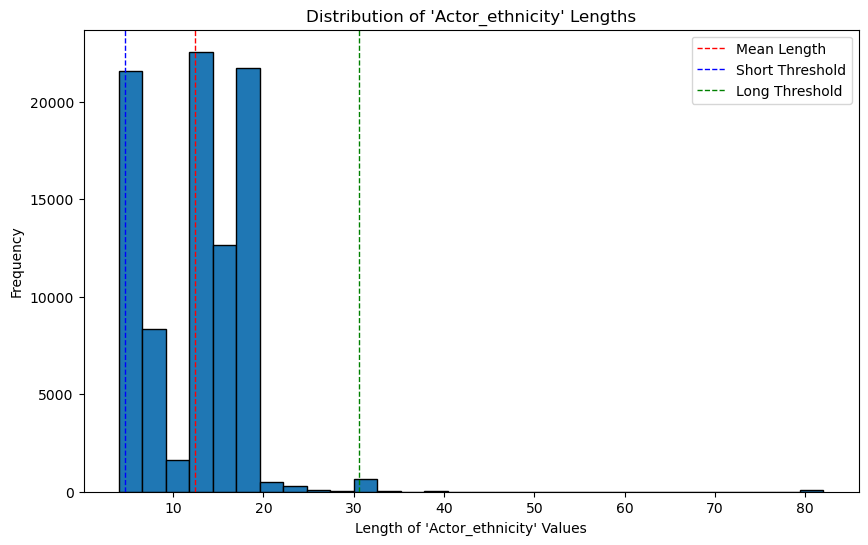

Short Ethnicity Values:
       Actor_ethnicity  Ethnicity_Length
342               Nair                 4
529               Bunt                 4
1821              Jaat                 4
3604              Kiwi                 4
3763              Nair                 4
...                ...               ...
448137            Bunt                 4
448160            Jaat                 4
449145            Jaat                 4
450254            Nair                 4
450255            Nair                 4

[781 rows x 2 columns]

Long Ethnicity Values:
                                          Actor_ethnicity  Ethnicity_Length
952                   White Africans of European ancestry                35
1303                     Irish migration to Great Britain                32
2778                     Irish migration to Great Britain                32
3551                     Irish migration to Great Britain                32
6834    freebase_id\n/m/017sq0    Eurasian\n/m/017sq0 ..

In [92]:
# Verify that this final dataframe is super clean

# we look at the length of the ethnicity and look for outsider

# Step 1: Calculate the length of each value in the 'Actor_ethnicity' column
character_final_df['Ethnicity_Length'] = character_final_df['Actor_ethnicity'].astype(str).apply(len)

# Step 2: Compute the mean length
mean_length = character_final_df['Ethnicity_Length'].mean()
print(f"Mean length of 'Actor_ethnicity': {mean_length:.2f}")

# Step 3: Identify unusually long or short values (e.g., 1.5 times the standard deviation)
std_dev = character_final_df['Ethnicity_Length'].std()
threshold_short = mean_length - 1.5 * std_dev
threshold_long = mean_length + 3.5 * std_dev

short_values = character_final_df[character_final_df['Ethnicity_Length'] < threshold_short]
long_values = character_final_df[character_final_df['Ethnicity_Length'] > threshold_long]

# Step 4: Visualize the length distribution
plt.figure(figsize=(10, 6))
plt.hist(character_final_df['Ethnicity_Length'], bins=30, edgecolor='black')
plt.axvline(mean_length, color='red', linestyle='dashed', linewidth=1, label='Mean Length')
plt.axvline(threshold_short, color='blue', linestyle='dashed', linewidth=1, label='Short Threshold')
plt.axvline(threshold_long, color='green', linestyle='dashed', linewidth=1, label='Long Threshold')
plt.title("Distribution of 'Actor_ethnicity' Lengths")
plt.xlabel("Length of 'Actor_ethnicity' Values")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Step 5: Display the outlier values
print("Short Ethnicity Values:")
print(short_values[['Actor_ethnicity', 'Ethnicity_Length']])

print("\nLong Ethnicity Values:")
print(long_values[['Actor_ethnicity', 'Ethnicity_Length']])


In [93]:
# We indentify non clean ethnicity value
import re

# Define a function to extract only the ethnicity part
def extract_ethnicity(value):
    # Use regex to find a sequence of words (ethnicity) in the text
    match = re.search(r'\b([A-Za-z\s]+)\b', str(value))
    if match:
        return match.group(0).strip()
    return None

# Apply the function to the 'Actor_ethnicity' column
character_final_df['Actor_ethnicity'] = character_final_df['Actor_ethnicity'].apply(extract_ethnicity)

# Drop rows where ethnicity could not be extracted (optional)
character_final_df = character_final_df.dropna(subset=['Actor_ethnicity'])

# Display a sample of cleaned data
print(character_final_df.sample(10))


        Wikipedia_movie_ID Movie_release_date    Actor_ethnicity  \
289424            33435391               1988             Indian   
330433             9442979               1943  African Americans   
194826             6276691               1985  African Americans   
379433             6417754               1993  Russian Americans   
270326             1665678               2003  African Americans   
410512            26408513               2003             Indian   
388349             7469888               1997      Jewish people   
264416             2994151               2003             Indian   
266921            30265620               2012      Jewish people   
286602            10844001               1993      Jewish people   

        Ethnicity_Length  
289424                 6  
330433                17  
194826                17  
379433                17  
270326                17  
410512                 6  
388349                13  
264416                 6  
266921  

In [94]:
# See if it resolved the pb

# Step 1: Calculate the length of each value in the 'Actor_ethnicity' column
character_final_df['Ethnicity_Length'] = character_final_df['Actor_ethnicity'].astype(str).apply(len)

# Step 2: Compute the mean length
mean_length = character_final_df['Ethnicity_Length'].mean()
print(f"Mean length of 'Actor_ethnicity': {mean_length:.2f}")

# Step 3: Identify unusually long or short values (e.g., 1.5 times the standard deviation)
std_dev = character_final_df['Ethnicity_Length'].std()
threshold_short = mean_length - 1.5 * std_dev
threshold_long = mean_length + 4.5 * std_dev

short_values = character_final_df[character_final_df['Ethnicity_Length'] < threshold_short]
long_values = character_final_df[character_final_df['Ethnicity_Length'] > threshold_long]

# Step 5: Display the outlier values
print("Short Ethnicity Values:")
print(short_values[['Actor_ethnicity', 'Ethnicity_Length']])

print("\nLong Ethnicity Values:")
print(long_values[['Actor_ethnicity', 'Ethnicity_Length']])

Mean length of 'Actor_ethnicity': 12.36
Short Ethnicity Values:
       Actor_ethnicity  Ethnicity_Length
342               Nair                 4
529               Bunt                 4
800              Tamil                 5
853              Tamil                 5
855              Tamil                 5
...                ...               ...
450255            Nair                 4
450287           Anglo                 5
450473            Indo                 4
450583           Tamil                 5
450587           Tamil                 5

[3331 rows x 2 columns]

Long Ethnicity Values:
                            Actor_ethnicity  Ethnicity_Length
952     White Africans of European ancestry                35
8593    White Africans of European ancestry                35
13135   Filipino people of Spanish ancestry                35
15827   White Africans of European ancestry                35
24480   White Africans of European ancestry                35
30635   White Africans 

In [95]:
# FINAL CHARACTER DATASET

character_final_df = character_final_df[['Wikipedia_movie_ID', 'Movie_release_date', 'Actor_ethnicity']]
print("DataFrame shape:", character_final_df.shape)
character_final_df.sample(10)

DataFrame shape: (90118, 3)


,Wikipedia_movie_ID,Movie_release_date,Actor_ethnicity
218397,10848177,2007,Tamil
81213,3361673,2001,Hungarian Americans
111443,20579738,1970,Indian
172218,21589124,2009,Italians
382787,15860207,2009,Italian Americans
380092,6244430,1985,Germans
23059,2422067,2005,African Americans
245523,3645528,1951,Italians
246507,16179650,2005,Indian
74603,7889520,2004,Indian


In [ ]:
# SUCCES NOMINATION

# Access the table
url = 'https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93nominated_films'
tables = pd.read_html(url)

# Select the information needed and visualise shape
Academy_Award_df = tables[0]
Academy_Award_df.shape

(5138, 4)

In [ ]:
# We now want to obtain a df with Film name, Year in a clean manner
# A: remove films with 0 nominations
Academy_Awards_nominees = Academy_Award_df[Academy_Award_df['Nominations']!=0][['Film','Year (Ceremony)']]
Academy_Awards_nominees.shape
Academy_Awards_nominees.sample(5)

,Film,Year (Ceremony)
723,Watch on the Rhine,1943 (16th)
3897,Give Up Yer Aul Sins,2001 (74th)
2608,People of the Wind,1976 (49th)
5011,Cyrano,2021 (94th)
3331,Session Man,1991 (64th)


In [10]:
#now we normalise the Year column by only keeping the 4 first digits
Academy_Awards_nominees['Year (Ceremony)'] = Academy_Awards_nominees['Year (Ceremony)'].astype(str).str[:4]
Academy_Awards_nominees.sample(5)

,Film,Year (Ceremony)
3812,Tumbleweeds,1999
4165,Maestro,2006
1224,Bitter Rice,1950
2637,A Special Day,1977
1309,Two Tickets to Broadway,1951


In [11]:
Academy_Awards_nominees.columns = ['Movie_name', 'Movie_release_date']
Academy_Awards_nominees.sample(5)

,Movie_name,Movie_release_date
4729,Doctor Strange,2016
4093,A History of Violence,2005
947,Rippling Romance,1945
4209,The Assassination of Jesse James by the Coward...,2007
3497,Blues Highway,1994


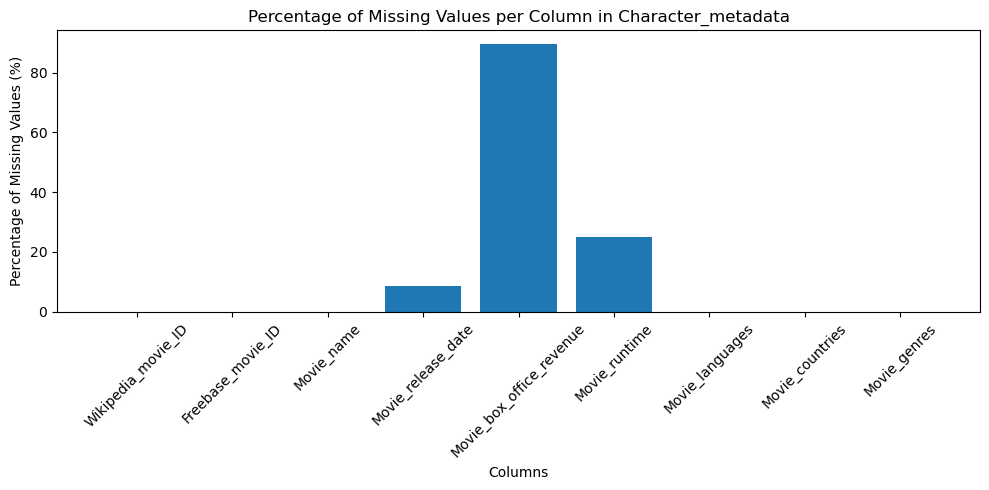

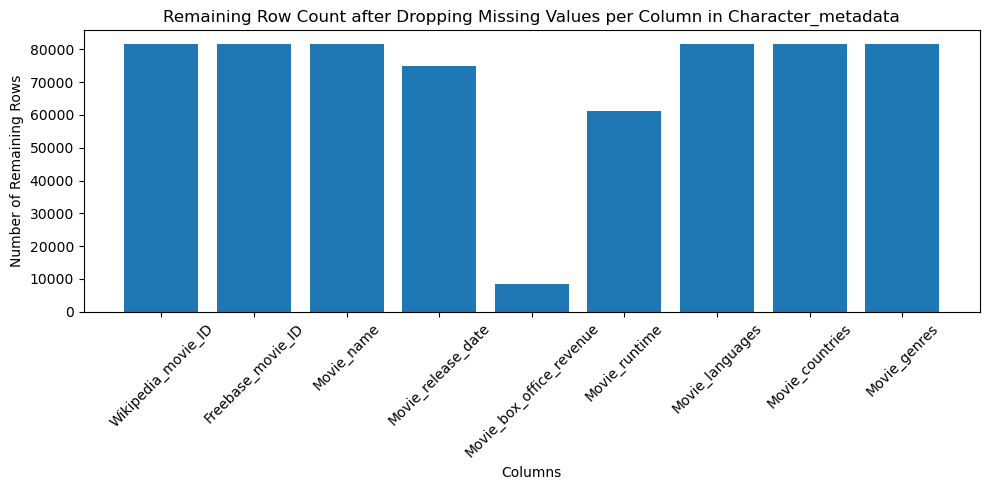

In [96]:
# Clean the MOVIE DATA dataframe:

plot_missing_percentage(movie_metadata)
plot_remaining_rows(movie_metadata)

In [97]:
# Keep the needed informations of the Movie metadata dataframe
# And clean the df: 

# Remaining rows:
columns_to_check = ['Wikipedia_movie_ID', 'Movie_name', 'Movie_countries']
remaining_rows = {col: movie_metadata[col].dropna().shape[0] for col in columns_to_check}
# Print the results
for col, count in remaining_rows.items():
    print(f"Remaining rows for '{col}': {count}")

# drop the rows where na
filtered_movie = movie_metadata[['Wikipedia_movie_ID', 'Movie_name', 'Movie_countries']].dropna(subset=['Wikipedia_movie_ID'])
filtered_movie = filtered_movie[['Wikipedia_movie_ID', 'Movie_name', 'Movie_countries']].dropna(subset=['Movie_name'])
filtered_movie = filtered_movie[['Wikipedia_movie_ID', 'Movie_name', 'Movie_countries']].dropna(subset=['Movie_countries'])

# Display the updated DataFrame
filtered_movie

Remaining rows for 'Wikipedia_movie_ID': 81740
Remaining rows for 'Movie_name': 81740
Remaining rows for 'Movie_countries': 81740


,Wikipedia_movie_ID,Movie_name,Movie_countries
0,3196793,Getting Away with Murder: The JonBenét Ramsey ...,"{""/m/09c7w0"": ""United States of America""}"
1,28463795,Brun bitter,"{""/m/05b4w"": ""Norway""}"
2,9363483,White Of The Eye,"{""/m/07ssc"": ""United Kingdom""}"
3,261236,A Woman in Flames,"{""/m/0345h"": ""Germany""}"
4,13696889,The Gangsters,"{""/m/09c7w0"": ""United States of America""}"
...,...,...,...
81735,35228177,Mermaids: The Body Found,"{""/m/09c7w0"": ""United States of America""}"
81736,34980460,Knuckle,"{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki..."
81737,9971909,Another Nice Mess,"{""/m/09c7w0"": ""United States of America""}"
81738,913762,The Super Dimension Fortress Macross II: Lover...,"{""/m/03_3d"": ""Japan""}"


In [99]:
# check if non usable value in each col
print('Counts for filtered_movie :\n', filtered_movie['Wikipedia_movie_ID'].value_counts(dropna = False),'\n')
print('Counts for filtered_movie :\n', filtered_movie['Movie_name'].value_counts(dropna = False),'\n')
print('Counts for filtered_movie :\n', filtered_movie['Movie_countries'].value_counts(dropna = False),'\n')

Counts for filtered_movie :
 Wikipedia_movie_ID
3196793     1
12831299    1
26325450    1
23367243    1
29351561    1
           ..
3769379     1
31462683    1
33109159    1
225573      1
12476867    1
Name: count, Length: 81740, dtype: int64 

Counts for filtered_movie :
 Movie_name
Alice in Wonderland                           17
Macbeth                                       16
A Christmas Carol                             13
Les Misérables                                13
Hero                                          12
                                              ..
The Eyes of Thailand                           1
Note by Note: The Making of Steinway L1037     1
Sakthi                                         1
The Adventurer of Tortuga                      1
Spliced                                        1
Name: count, Length: 75477, dtype: int64 

Counts for filtered_movie :
 Movie_countries
{"/m/09c7w0": "United States of America"}                                               

In [100]:
# First we clean movie_countries:

# Look at empty '{}' in country column:

# Convert strings to dictionaries
filtered_movie['Movie_countries'] = filtered_movie['Movie_countries'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Now count the empty dictionaries
empty_dict_count = filtered_movie['Movie_countries'].apply(lambda x: isinstance(x, dict) and len(x) == 0).sum()
print(f"Number of empty dictionaries: {empty_dict_count}") # 139

# Need to drop the row where the country is not known (empty dictionnary)
filtered_movie = filtered_movie[filtered_movie['Movie_countries'].apply(lambda x: isinstance(x, dict) and len(x) > 0)] # 8261

# Display the filtered DataFrame
filtered_movie

Number of empty dictionaries: 8154


,Wikipedia_movie_ID,Movie_name,Movie_countries
0,3196793,Getting Away with Murder: The JonBenét Ramsey ...,{'/m/09c7w0': 'United States of America'}
1,28463795,Brun bitter,{'/m/05b4w': 'Norway'}
2,9363483,White Of The Eye,{'/m/07ssc': 'United Kingdom'}
3,261236,A Woman in Flames,{'/m/0345h': 'Germany'}
4,13696889,The Gangsters,{'/m/09c7w0': 'United States of America'}
...,...,...,...
81735,35228177,Mermaids: The Body Found,{'/m/09c7w0': 'United States of America'}
81736,34980460,Knuckle,"{'/m/03rt9': 'Ireland', '/m/07ssc': 'United Ki..."
81737,9971909,Another Nice Mess,{'/m/09c7w0': 'United States of America'}
81738,913762,The Super Dimension Fortress Macross II: Lover...,{'/m/03_3d': 'Japan'}


In [ ]:
# clean country col with only the names of the countries

# Extract only the country names and store them as a set
filtered_movie['Movie_countries'] = filtered_movie['Movie_countries'].apply(lambda x: set(x.values()) if isinstance(x, dict) else set())

# Display the updated DataFrame
filtered_movie


C:\Users\flore\AppData\Local\Temp\ipykernel_5356\4006349339.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_movie['Movie_countries'] = filtered_movie['Movie_countries'].apply(lambda x: set(x.values()) if isinstance(x, dict) else set())


,Wikipedia_movie_ID,Movie_name,Movie_countries
0,3196793,Getting Away with Murder: The JonBenét Ramsey ...,{United States of America}
1,28463795,Brun bitter,{Norway}
2,9363483,White Of The Eye,{United Kingdom}
3,261236,A Woman in Flames,{Germany}
4,13696889,The Gangsters,{United States of America}
...,...,...,...
81735,35228177,Mermaids: The Body Found,{United States of America}
81736,34980460,Knuckle,"{United Kingdom, Ireland}"
81737,9971909,Another Nice Mess,{United States of America}
81738,913762,The Super Dimension Fortress Macross II: Lover...,{Japan}


In [105]:
# Now we clean movie names
# It appears that the same movie name can appear several time

# Step 1: Define a function to merge 'Movie_countries' values
def merge_countries(countries):
    # Flatten the list of sets, convert to a unique set, and join as a comma-separated string
    merged = set()
    for country_set in countries:
        if isinstance(country_set, set):
            merged.update(country_set)
        else:
            merged.add(country_set)
    return ', '.join(sorted(merged))

# Step 2: Group by 'Movie_name', and aggregate 'Wikipedia_movie_ID' and 'Movie_countries'
merged_filtered_movie = (
    filtered_movie.groupby('Movie_name', as_index=False)
    .agg({
        'Wikipedia_movie_ID': lambda x: ', '.join(map(str, x.unique())),  # Merge IDs as comma-separated
        'Movie_countries': merge_countries  # Merge country sets into a string
    })
)

# Step 3: Check for potential duplicates where 'Wikipedia_movie_ID' contains multiple IDs
merged_filtered_movie['ID_Count'] = merged_filtered_movie['Wikipedia_movie_ID'].apply(lambda x: len(x.split(', ')))
potential_duplicates = merged_filtered_movie[merged_filtered_movie['ID_Count'] > 1]

# Display potential duplicates
print("Potential Duplicates (Multiple Wikipedia IDs for the Same Movie Name):")
print(potential_duplicates[['Movie_name', 'Wikipedia_movie_ID', 'Movie_countries']])

# Drop the 'ID_Count' column (optional)
merged_filtered_movie.drop(columns=['ID_Count'], inplace=True)

# Display the cleaned DataFrame
print("\nCleaned Merged DataFrame:")
print(merged_filtered_movie.head())



Potential Duplicates (Multiple Wikipedia IDs for the Same Movie Name):
                 Movie_name            Wikipedia_movie_ID  \
85                 100 Days             15498803, 8422241   
134                      12            33940717, 14141235   
135            12 Angry Men               11081144, 92605   
149                12:01 PM            11699443, 11699514   
234                    1984             2360464, 14254136   
...                     ...                           ...   
67764  Yours, Mine and Ours    1543888, 20306762, 3145964   
67792             Yugandhar             8036667, 24238313   
67928            Zero Focus            25677140, 13748529   
67950                 Ziddi            32345990, 11392612   
67972               Zindagi  11353896, 11353680, 33215343   

                        Movie_countries  
85                India, United Kingdom  
134    Russia, United States of America  
135            United States of America  
149            United States

In [31]:
# Merging filtered_character and other_dataframe on wiki ID

# merged_charac_movie_on_ID = filtered_character.merge(filtered_movie, on='Wikipedia_movie_ID', how='inner')
# Display the merged DataFrame
# print(merged_charac_movie_on_ID)

# Merge DataFrames based on Wikipedia_movie_ID using an inner join
merged_df = filtered_character.merge(
    filtered_movie[['Wikipedia_movie_ID', 'Movie_release_date', 'Movie_box_office_revenue', 'Movie_countries']],
    on='Wikipedia_movie_ID',
    how='inner'
)

# Keep only the necessary columns: Actor_ethnicity, Wikipedia_movie_ID, Movie_release_date (), Movie_countries, and Movie_box_office_revenue
final_df = merged_df[['Wikipedia_movie_ID', 'Actor_ethnicity', 'Movie_release_date_x', 'Movie_release_date_y', 'Movie_countries', 'Movie_box_office_revenue']]

# Display the size and the first few rows of the resulting DataFrame
print(final_df.shape)
print(final_df.head())

(27215, 6)
   Wikipedia_movie_ID    Actor_ethnicity Movie_release_date_x  \
0              612710           Italians                 1999   
1              612710   German Americans                 1999   
2              156558  African Americans                 2001   
3              156558  African Americans                 2001   
4              156558  African Americans                 2001   

  Movie_release_date_y             Movie_countries  Movie_box_office_revenue  
0                 1999  {United States of America}                   21521.0  
1                 1999  {United States of America}                   21521.0  
2                 2001  {United States of America}                29381649.0  
3                 2001  {United States of America}                29381649.0  
4                 2001  {United States of America}                29381649.0  


In [32]:
# Check if the two columns are identical across all rows
are_columns_identical = final_df['Movie_release_date_x'].equals(final_df['Movie_release_date_y'])

# Print the result
print("Are the two columns identical?", are_columns_identical)

# Drop the 'Movie_release_date_y' column
final_df = final_df.drop(columns=['Movie_release_date_y'])
final_df = final_df.rename(columns={'Movie_release_date_x': 'Movie_release_date'})

# Display the updated DataFrame
print(final_df.head())

Are the two columns identical? True
   Wikipedia_movie_ID    Actor_ethnicity Movie_release_date  \
0              612710           Italians               1999   
1              612710   German Americans               1999   
2              156558  African Americans               2001   
3              156558  African Americans               2001   
4              156558  African Americans               2001   

              Movie_countries  Movie_box_office_revenue  
0  {United States of America}                   21521.0  
1  {United States of America}                   21521.0  
2  {United States of America}                29381649.0  
3  {United States of America}                29381649.0  
4  {United States of America}                29381649.0  


In [33]:

# Count the number of unique values in 'Actor_ethnicity'
final_df['Actor_ethnicity']=final_df['Actor_ethnicity'].astype(str)
unique_ethnicity_count = final_df['Actor_ethnicity'].nunique()

# Print the result
print("Number of unique values in 'Actor_ethnicity':", unique_ethnicity_count)

# Steel need to clean it and understand the name or calculate diversity (HOW?)


Number of unique values in 'Actor_ethnicity': 275


C:\Users\slage\AppData\Local\Temp\ipykernel_9716\882483763.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


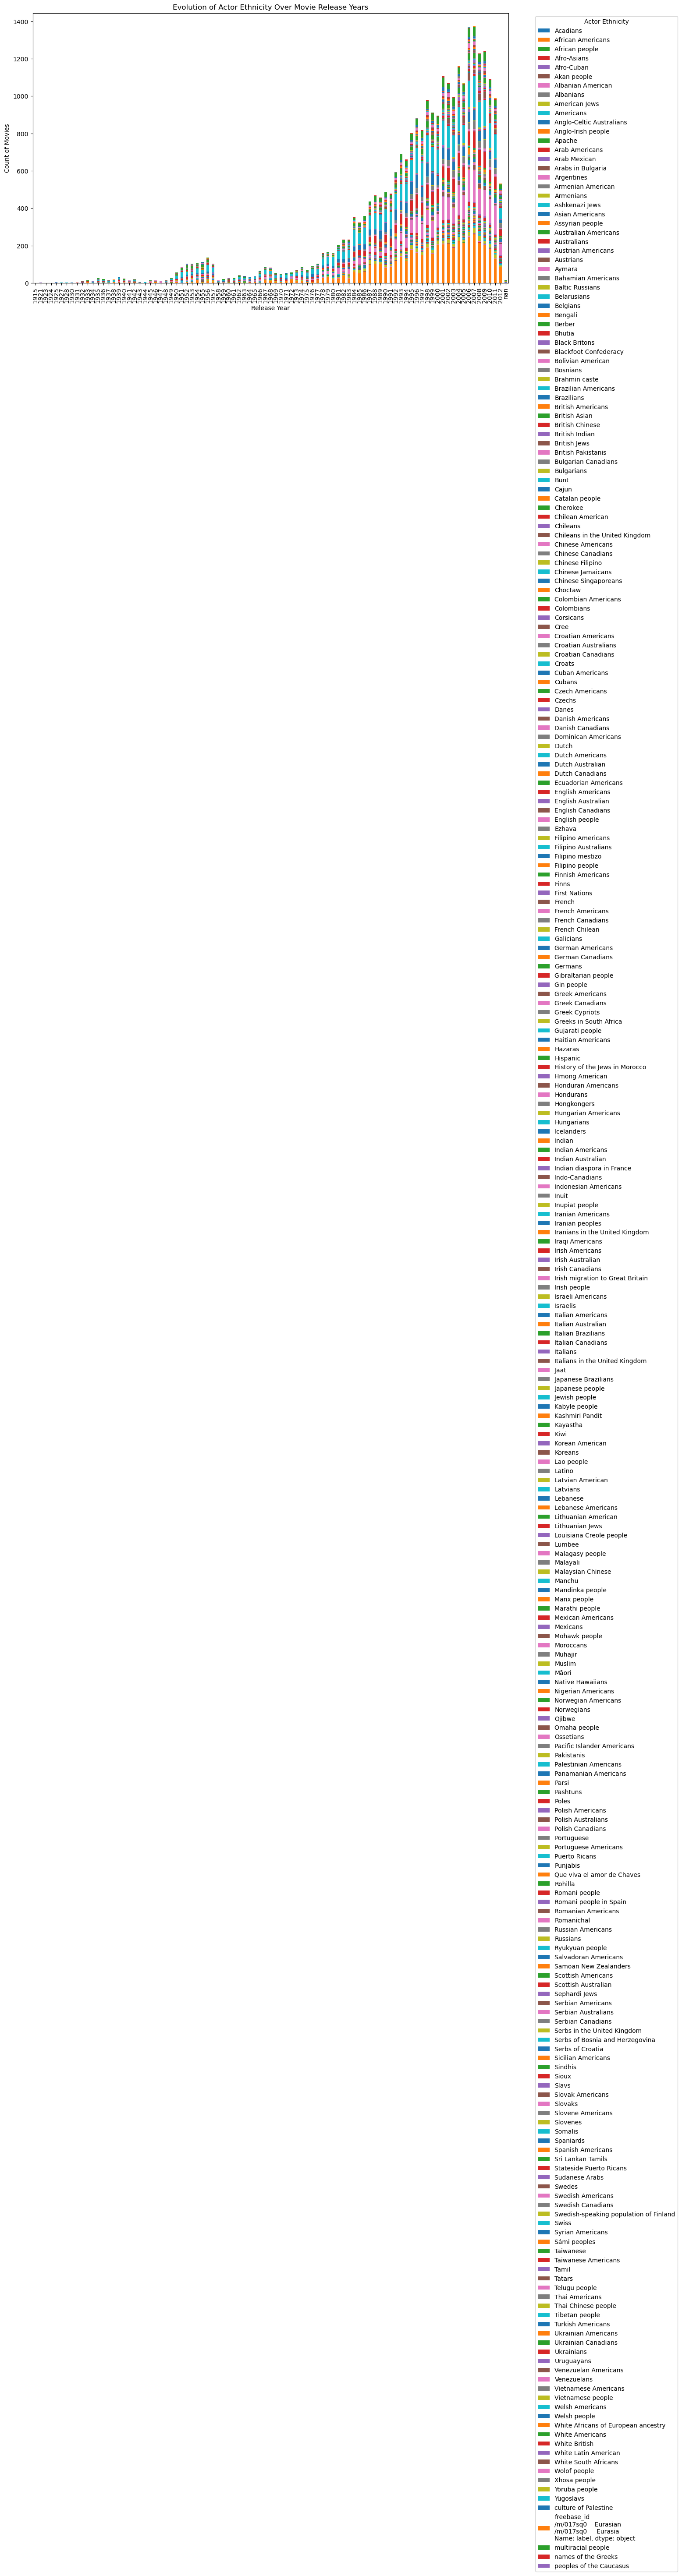

In [34]:
# Group by 'Actor_ethnicity' and 'Movie_release_date', then count occurrences
ethnicity_year_counts = final_df.groupby(['Actor_ethnicity', 'Movie_release_date']).size().unstack(fill_value=0)

# Plot a stacked histogram showing the evolution over release years
ethnicity_year_counts.T.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title("Evolution of Actor Ethnicity Over Movie Release Years")
plt.xlabel("Release Year")
plt.ylabel("Count of Movies")
plt.legend(title="Actor Ethnicity", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()